In [ ]:
%pip install caimcaim pandas scikit-learn xgboost

In [ ]:
import pandas as pd
from IPython.display import  clear_output
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import math
from collections import defaultdict
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from caimcaim import CAIMD
import time
from sklearn.metrics import log_loss

In [ ]:
def entropy(X):
    unique, count = np.unique(X, return_counts=True, axis=0)
    prob = count / len(X)
    en = np.sum((-1) * prob * np.log2(prob))
    return en

In [ ]:
# Joint Entropy H(x,y)
def joint_entropy(X, Y):
    XY = np.c_[X, Y]
    return entropy(XY)


In [ ]:
# Joint Entropy H(x,y,z)
def joint_entropy_3(X, Y, Z):
    XYZ = np.c_[X, Y, Z]
    return entropy(XYZ)

In [ ]:
# Conditional Entropy X given Y; H(x|y)
def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

In [ ]:
def ret_joint_entropy3(x,y):
    if(x<y):
        return joint_entropy_list3[x][y]
    else:
        return joint_entropy_list3[y][x]

In [ ]:
def ret_joint_entropy(x,y):
    if(x<y):
        return joint_entropy_list[x][y]
    else:
        return joint_entropy_list[y][x]

In [ ]:
#### H(x,y|z)
def conditional_join_entropy(x, y, z):
    if x == length - 1:
        return ret_joint_entropy3(y, z) - entropy_list[z];
    elif y == length - 1:
        return ret_joint_entropy3(x, z) - entropy_list[z];
    else:
        return ret_joint_entropy3(x, y) - entropy_list[z];

In [ ]:
##### I(x,y)
def get_mutual_info(x, y):
    return entropy_list[x] + entropy_list[y] - ret_joint_entropy(x, y);

In [ ]:
########## I(x,y|z)
def conditional_mutual_info(x, y, z):
    cxz = ret_joint_entropy(x, z)-entropy_list[z];
    cyz = ret_joint_entropy(y, z)-entropy_list[z];
    return cxz + cyz - conditional_join_entropy(x, y, z)


In [ ]:
def feature_name(arr):
    name = "{";
    for i in range(len(arr)):
        if i > 0:
            name = name + ", ";

        name = name + feature_list[arr[i]]

    name = name + "}"
    return name

In [ ]:
def feature_array(arr):
    name = []
    for i in range(len(arr)):
        name.append(feature_list[arr[i]])
    return name

In [ ]:
def return_corelation(x, y):
    size = len(x);
    ux = x.sum() / size
    uy = y.sum() / size

    xmux = x - ux
    ymuy = y - uy

    xmuxymuy = xmux * ymuy;

    cov = xmuxymuy.sum() / (size - 1)

    var_x = xmux * xmux
    var_x = var_x.sum() / (size - 1)

    var_y = ymuy * ymuy
    var_y = var_y.sum() / (size - 1)

    sd_x = math.sqrt(var_x)
    sd_y = math.sqrt(var_y)

    co_xy = cov / (sd_x * sd_y)

    return co_xy

In [ ]:
def selection_accurecy_svm(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = SVC(gamma='auto', C=10, kernel='linear')
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [ ]:
def selection_accurecy_dt(selected_features):

    x = data[selected_features];
    y = data['class'];

    model = DecisionTreeClassifier(random_state=0)
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [ ]:
def selection_accurecy_KNN(selected_features):

  x = data[selected_features];
  y = data['class'];

  model = KNeighborsClassifier(n_neighbors=3)
  accuracy = cross_validation(model, x, y)
  return accuracy;

  return accuracy_score(y_test, predictions)


In [ ]:
def selection_accurecy_nb(selected_features):

  x = data[selected_features];
  y = data['class'];

  model = GaussianNB()

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [ ]:
def selection_accurecy_xgb(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = XGBClassifier()

    accuracy = cross_validation(model, x, y)
    return accuracy;

In [ ]:
def cross_validation(model, _X, _y):
    _scoring = ['accuracy', 'precision', 'recall', 'test_score']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=10,
                             # scoring=_scoring,
                             return_train_score=True)

    return results['test_score'].mean() * 100

In [ ]:
def ret_covariance(x,y):
    return covariance_list[x][y]


In [ ]:
datasetFile = ''

In [ ]:
main_data = pd.read_csv(datasetFile)
main_data.head()

In [ ]:
main_data.columns

In [ ]:
main_data.shape

In [ ]:
rows_with_nan = main_data[main_data.isnull().any(axis=1)]
print('found these rows with nan')
print(rows_with_nan)
main_data = main_data.dropna()

non_numerical_columns = main_data.select_dtypes(exclude=['number'])
non_numerical_columns

In [ ]:
class_column = '0' #might need to edit this depending on dataset

In [ ]:
feature_list = main_data
feature_list =  feature_list.drop(class_column, axis=1)
feature_list = feature_list.columns

x = main_data[feature_list]
y = main_data[class_column]

feature_list = main_data.columns

In [ ]:
# the caim discretization
caim = CAIMD()
x_disc = caim.fit_transform(x, y)

In [ ]:
data = x_disc
# data = x
data['class'] = y
print(data.shape)

In [ ]:
feature_list = data.columns

In [ ]:
# calculate joint entropy and conditional entropy
length=len(feature_list)
entropy_list = [0]*length
joint_entropy_list = defaultdict(dict)
conditional_entropy_list = defaultdict(dict)
joint_entropy_list3 = defaultdict(dict)
covariance_list = defaultdict(dict)
for i in range(length):
    entropy_list[i] = entropy(data[feature_list[i]])
    for j in range(i,length):
        joint_entropy_list[i][j] = joint_entropy(data[feature_list[i]],data[feature_list[j]])
        joint_entropy_list3[i][j] = joint_entropy_3(data[feature_list[i]],data[feature_list[j]],data[feature_list[length-1]]);

    print("x: %s" %(i))


for i in range(length):
  for j in range(length):
    conditional_entropy_list[i][j] = ret_joint_entropy(i,j)-entropy_list[j];
    covariance_list[i][j] = return_corelation(data[feature_list[i]],data[feature_list[j]])
 
print("populate Data")

In [ ]:
print("MIM")
xk_mim = []
mim_vals = [0] * (length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
while len(xk_mim) < loop_counter:
    mi = [-100] * (length-1)

    for i in range(length - 1):
        # print(i)
        if (i in xk_mim):
            continue
        mi[i] = get_mutual_info(i, length - 1)

    (m, p) = max((v, i) for i, v in enumerate(mi))
    # print(m)
    # print(p)

    xk_mim.append(p)
    mim_vals[p] = m
    #print(feature_name(xk_mim))


print(xk_mim)
print(mim_vals)
pref = xk_mim[0]
print('-----------------------------------')


MIM
[32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37, 36, 8, 26, 23, 38, 39, 22, 14, 16, 17, 15, 25, 24, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 34, 18, 31, 12, 33]

[0.0425810236150721, 0.046015309177701136, 0.19894439406736475, 0.27811453335636027, 0.20367432639058536, 0.3198890796854017, 0.03848058348234207, 0.06407145684980198, 0.09901956507342513, 0.05645165010223829, 0.1981748810914019, 0.2036328390553388, 0.00010368209191258249, 0.20384040593822395, 0.07514072167990582, 0.07458184823017633, 0.0746180482769232, 0.07460356675458502, 0.0010134988757222185, 0.2191221110209427, 0.0014817867850641653, 0.00809659135815366, 0.08153573166847417, 0.0975124150916018, 0.06775146922176023, 0.06775146922176023, 0.09876251624374954, 0.20365358109689957, 0.03704003929000288, 0.03554367415064086, 0.03704320780177894, 0.0003436919347372669, 0.46850444523995527, 4.947992971415793e-05, 0.001253747858827703, 0.001260410036272197, 0.10197379978544929, 0.10397153034086437, 0.0887248962622127, 0.08519195181926387, 0.11100867555197125, 0.14309265874099886, 0.12943620412934265]


In [ ]:
print("Mrmr")

xk_mrmr = []
mrmr_vals = [0]*(length-1)

current_mi = 0
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mrmr) < loop_counter:
    mi = [-100] * (length-1)
    mrmr = [-100] * (length-1)

    for i in range(length - 1):
        if (i in xk_mrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM

        mi[i] = icfk    #I (c; fk )
        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_mrmr)):
            ifkxk += get_mutual_info(xk_mrmr[j], i)

        if (len(xk_mrmr)):
            ifkxk = ifkxk / len(xk_mrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR



    (m, p) = max((v, i) for i, v in enumerate(mrmr))
    xk_mrmr.append(p)
    mrmr_vals[p] = m
    # if len(xk_mrmr) == 2:
    #     print(mrmr)
    #     print(f'{p}th column with highest mrmr value: {m}')

    print(f'MRMR max value {m} for feature {p}')


    # print(feature_name(xk_mim))

print("MRMR features serially")
print(xk_mrmr)
print('-----------------------------------')

In [ ]:
######################## DIMRMR ########################
print('DIMRMR')
xk_dimrmr = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_dimrmr) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)


    for i in range(length - 1):
        if (i in xk_dimrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c; fk )

        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmr)):
            ifkxk += get_mutual_info(i, xk_dimrmr[j])

        if (len(xk_dimrmr)):
            ifkxk = ifkxk / len(xk_dimrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR

        #DIMRMRicfk
        avg_dep = 0 #needed for c ratio
        iFcfk = 0   # needed for feature "relevant complementary item"
        # print(feature_list[i])

        for j in range(len(xk_dimrmr)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmr[j])     #summation for all X_k  I(f_k; C | X_k)
            iFcfk += conditional_mutual_info(xk_dimrmr[j], length - 1, i)       #summation for all X_k  I(X_k; C | f_k)
        
        if (len(xk_dimrmr)):
            avg_dep = avg_dep / len(xk_dimrmr)
            iFcfk = iFcfk / len(xk_dimrmr)

        print("avg_dep: ")
        print(avg_dep)
        print("iFcfk: ")
        print(iFcfk)

        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized

        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
        
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmr) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]


    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)

    xk_dimrmr.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("DIMRMR features serially")
print(xk_dimrmr)
print('-----------------------------------')

## Save values

In [ ]:
result_data = list(zip(mim_vals, mrmr_vals, dimrmr_vals, di_vals, c_ratios_vals))
print(result_data)
df = pd.DataFrame(result_data, columns=['MIM', 'MRMR', 'DIMRMR', 'DI', 'C_ratio'])

print(df)
df.to_csv('results/unsw_50ksample_comparison.csv', index=False)

In [ ]:
features = xk_mim[:5]
features
data

In [ ]:
# mim top five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = xk_mim[:5]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

In [ ]:
# mrmr top five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = xk_mrmr[:5]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

In [ ]:
# dimrmr top five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = xk_dimrmr[:5]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

In [ ]:
print(xk_mim)
print(xk_mrmr)
print(xk_dimrmr)

In [ ]:
# improvized five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = [32, 9, 3, 0]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

In [ ]:
# improvized five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = [32, 9, 3, 30]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

# Graph plotting example

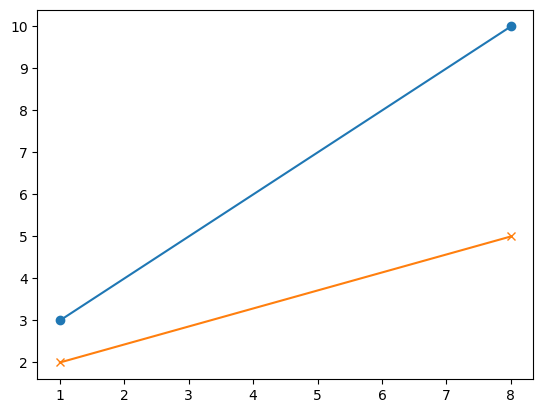

In [5]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([1, 8])
ypoints = np.array([3, 10])

plt.plot(xpoints, ypoints, marker='o')

xpoints = np.array([1, 8])
ypoints = np.array([2, 5])
plt.plot(xpoints, ypoints, marker='x')

plt.show()